## Digits Data

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, multilabel_confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve


import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_digits

In [3]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [16]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
df_digit = pd.DataFrame(digits.data, columns=digits.feature_names)
df_digit['Target'] = digits.target
df_digit

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [7]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

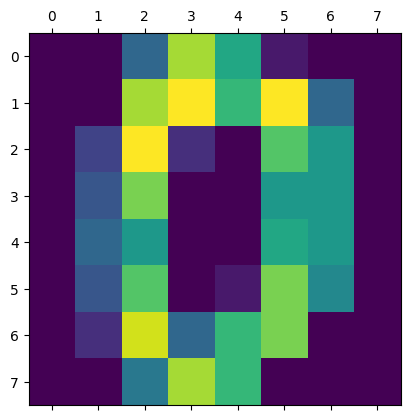

In [8]:
plt.matshow(digits.images[0])

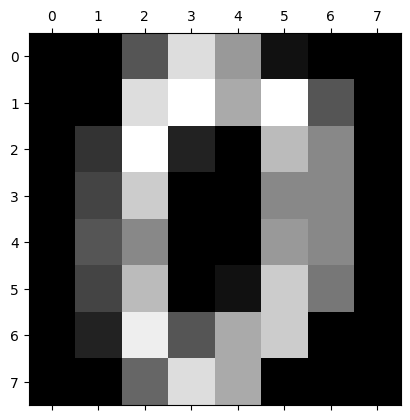

In [9]:
plt.matshow(digits.images[0])
plt.gray()

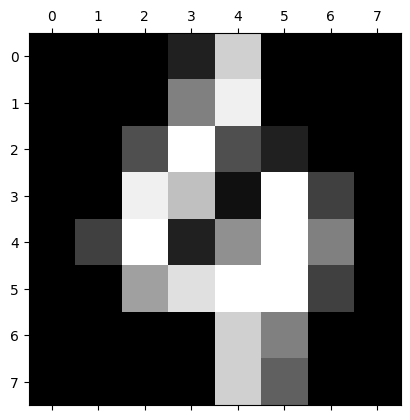

In [11]:
plt.matshow(digits.images[100])
plt.gray()

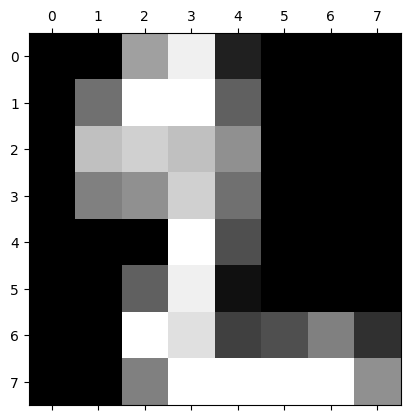

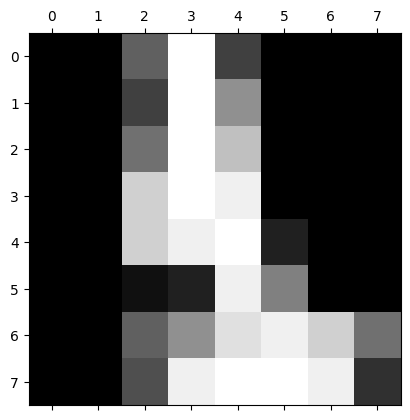

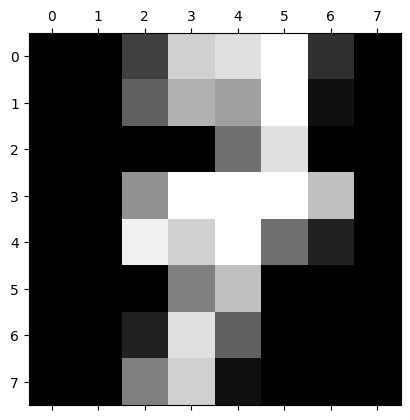

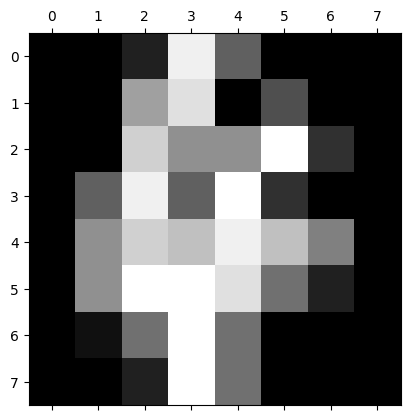

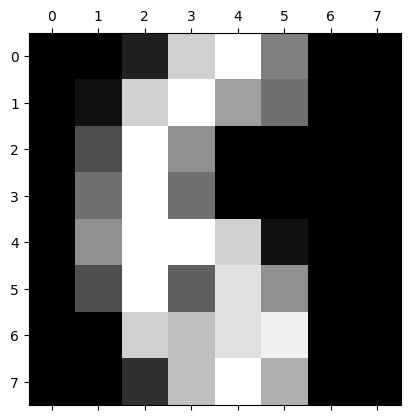

In [12]:
for i in range(600, 605):
    plt.matshow(digits.images[i])
    plt.gray()

In [13]:
x = df_digit.drop('Target', axis=1)
y = df_digit['Target']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=2, stratify=y)

In [15]:
log_clf = LogisticRegression(multi_class='ovr')
log_clf.fit(x_train, y_train)

LogisticRegression(multi_class='ovr')

## Evaluation

In [17]:
def evaluate_model(model, ind_var, act):
    pred = model.predict(ind_var)
    
    acc_score = accuracy_score(act, pred)
    print('Accuracy Score :', acc_score)
    print('***'*20)
    
    cnf_matrix = confusion_matrix(act, pred)
    print('Confusion Matrix : \n', cnf_matrix)
    print('***'*20)
    
    multilabel_cnf_matrix = multilabel_confusion_matrix(act, pred)
    print('Multilabel Confusion Matrix : \n', multilabel_cnf_matrix)
    print('***'*20)
    
    clf_report = classification_report(act, pred)
    print('Classification Report : \n', clf_report)
    print('***'*20)
    
    return pred

print('Testing Data Evaluation'.center(60, '*'))
y_pred = evaluate_model(log_clf, x_test, y_test)

******************Testing Data Evaluation*******************
Accuracy Score : 0.9472222222222222
************************************************************
Confusion Matrix : 
 [[36  0  0  0  0  0  0  0  0  0]
 [ 0 33  0  1  0  1  0  0  1  0]
 [ 0  1 33  0  0  0  0  0  1  0]
 [ 0  0  0 34  0  0  0  1  2  0]
 [ 0  0  0  0 35  0  0  0  0  1]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  1  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  1  0  0 35  0  0]
 [ 0  3  0  1  0  0  0  0 30  1]
 [ 0  0  0  2  0  0  0  0  1 33]]
************************************************************
Multilabel Confusion Matrix : 
 [[[324   0]
  [  0  36]]

 [[319   5]
  [  3  33]]

 [[325   0]
  [  2  33]]

 [[319   4]
  [  3  34]]

 [[323   1]
  [  1  35]]

 [[322   1]
  [  0  37]]

 [[324   0]
  [  1  35]]

 [[323   1]
  [  1  35]]

 [[320   5]
  [  5  30]]

 [[322   2]
  [  3  33]]]
************************************************************
Classification Report : 
               precision    recall  f1-score   supp

In [ ]:
Why project actually exist:
    Revenue Generation(Maximisation)
    Revenue Loss (Optimization)
    Manpower management
    Time management
    Process Management
    Automation

In [ ]:
                  pos      neg
               non-def     def
non-def  pos      TP       FP
def      neg      FN       TN


Precision >> def been predicted as non defaulter >> loan will be given to wrong person >> Revenue Loss

Recall >> non def been predicted as defaulter >> loan should have been given to non def >> Revenue Generation Stopped

Revenue Generation(Maximisation):
    Recall
    
Revenue Loss (Optimization):
    Precision